1. Import dependencies:

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
#from google.colab.patches import cv2_imshow
from PIL import Image
import tensorflow as tf
tf.random.set_seed(3)
from tensorflow import keras
from keras.datasets import mnist
from tensorflow.math import confusion_matrix

2. Loading the MNIST data from keras:

A- Creating the variables of testing and training:

In [3]:
(X_train , Y_train) , (X_test, Y_test) = mnist.load_data()

B- Type of the datas:

In [4]:
type(X_train)

numpy.ndarray

C- The dimensions of the data:

In [5]:
print(X_train.shape) #6000 images with 28*28 px (it's a gray image)
print(Y_train.shape)
print(X_test.shape) #1000 images with 28*28 px (it's a gray image)
print(Y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


2. Visualisation of our image:

A- Displaying an example:

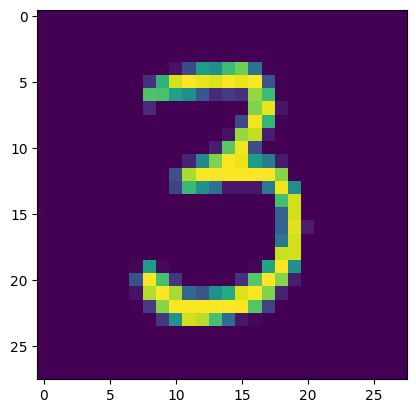

3


In [6]:
plt.imshow(X_train[50])
plt.show()
print(Y_train[50])

B- The value that the systeme will be predict:

In [7]:
print(np.unique(Y_train))

[0 1 2 3 4 5 6 7 8 9]


3. Normalisation (all value should be in range 0 & 1):

A- Scalling the value:

In [8]:
X_train = X_train / 255
X_test = X_test / 255

4. Building the Neural Network:

A- Setting some layers of the Neural Network:

In [9]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape = (28, 28)), 
    keras.layers.Dense(50, activation = 'relu'),
    keras.layers.Dense(50, activation = 'relu'), #You can any value
    keras.layers.Dense(10, activation = 'softmax') #10 -> number of classes output (0 , 1 ... 9)
])

B- Compiling the neural Network:

In [10]:
model.compile(optimizer= 'adam' , loss= 'sparse_categorical_crossentropy',
             metrics = ['accuracy'] )

C- Training our Neural network:

In [11]:
model.fit(X_train, Y_train , epochs= 10)

Epoch 1/10


1875/1875 [==============================] - 7s 3ms/step - loss: 0.3001 - accuracy: 0.9125
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1385 - accuracy: 0.9588
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1012 - accuracy: 0.9696
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0813 - accuracy: 0.9746
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0685 - accuracy: 0.9792
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0602 - accuracy: 0.9805
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0513 - accuracy: 0.9833
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0449 - accuracy: 0.9854
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9859
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0

In [12]:
# After training the model, save it to a file:
model.save('path_to_my_model.h5')

# You can also save it in the TensorFlow SavedModel format:
model.save('path_to_my_model')


c:\Users\HP\AppData\Local\Programs\Python\Python39\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


INFO:tensorflow:Assets written to: path_to_my_model\assets


INFO:tensorflow:Assets written to: path_to_my_model\assets


D- Accuracy of the test data:

In [13]:
loss , accuracy = model.evaluate(X_test , Y_test)
print(loss)
print(accuracy)

313/313 [==============================] - 1s 2ms/step - loss: 0.1127 - accuracy: 0.9700
0.11266445368528366
0.9700000286102295


E- Example:

In [14]:
Y_pred = model.predict(X_test)

313/313 [==============================] - 1s 2ms/step


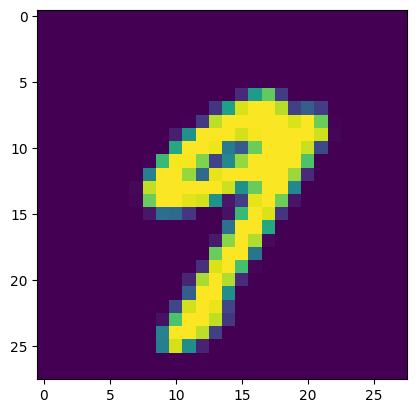

In [15]:
plt.imshow(X_test[20])
plt.show()

In [16]:
print("The value is:", np.argmax(Y_pred[20]))

The value is: 9


F- All the prediction of the model:

In [17]:
Y_pred_value = [np.argmax(i) for i in Y_pred]
print(Y_pred_value[47]) #Exemple

2


5. Confusion Matrix:

A- Creating the matrix:

In [18]:
M = confusion_matrix(Y_test , Y_pred_value) #True value vs predictin value

B- Construction of the heatmap:

Text(0.5, 58.7222222222222, 'Predicted values')

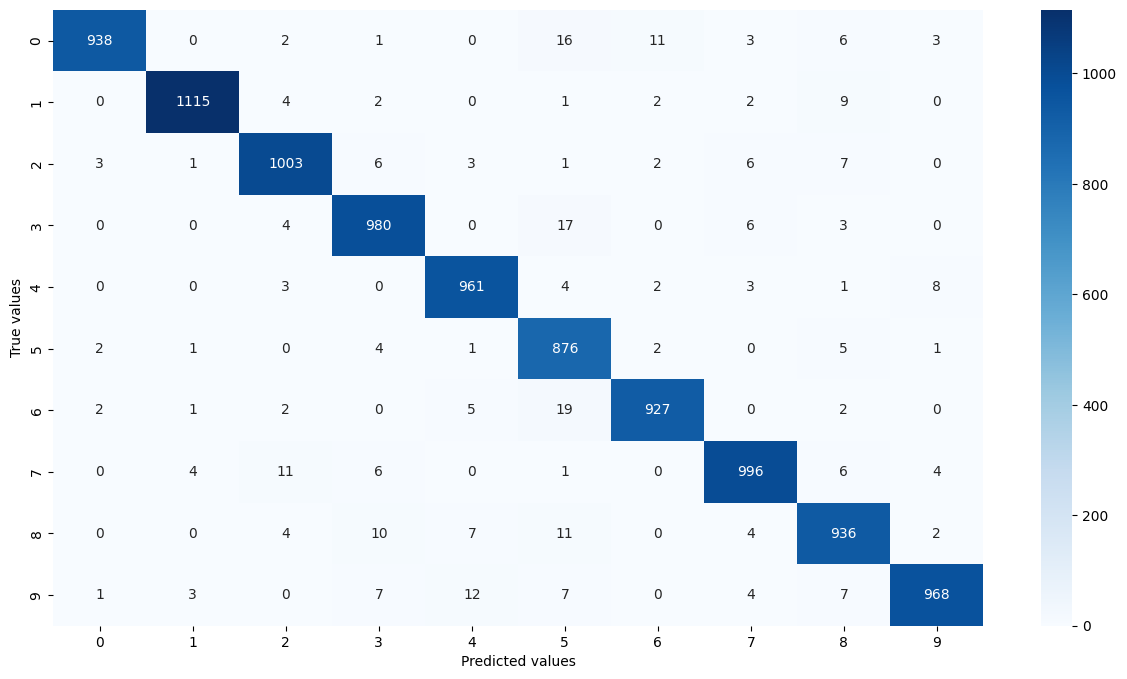

In [19]:
plt.figure(figsize= (15, 8))
sns.heatmap(M, annot=True, fmt='d', cmap='Blues')
plt.ylabel('True values')
plt.xlabel('Predicted values')

6. Example:

In [20]:
def mnistPredictionPIL(path):
    input_image = Image.open(path)
    # Convertir l'image en niveaux de gris
    image_gray = input_image.convert('L')
    # Redimensionner l'image à 28x28 pixels
    image_resize = image_gray.resize((28, 28))
    # Convertir l'image PIL en un array numpy et normaliser les pixels
    image_np = np.array(image_resize) / 255.0
    image_reshaped = np.reshape(image_np, [1, 28, 28])
    # Prédire le chiffre
    predict = model.predict(image_reshaped)
    predictNum = np.argmax(predict)
    # Afficher l'image originale
    plt.imshow(input_image)
    plt.show()
    print('The predicted number is:', predictNum)

# Exemple d'utilisation
path = '53809dd3-5e34-4048-8924-ed80851787dd.jpg'
mnistPredictionPIL(path)

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Deep_learning Python\\projects\\WhatsApp Image 2024-02-21 at 12.11.07 (1).jpeg'

In [ ]:
# Loading the model back from the HDF5 file:
model_h5 = keras.models.load_model('path_to_my_model.h5')
# Loading the model back from the SavedModel format:
model_savedmodel = keras.models.load_model('path_to_my_model')
